In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes dataset.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
## Checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# checking for zeros
print('0s')
print(df.eq(0).sum())

0s
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [9]:
# Replace the 0 with Nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [10]:
# Checking 0 again
print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [11]:
#checking null values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
# Fill Nan with mean
df.fillna(df.mean(),inplace = True)

In [13]:
# checking NAN values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


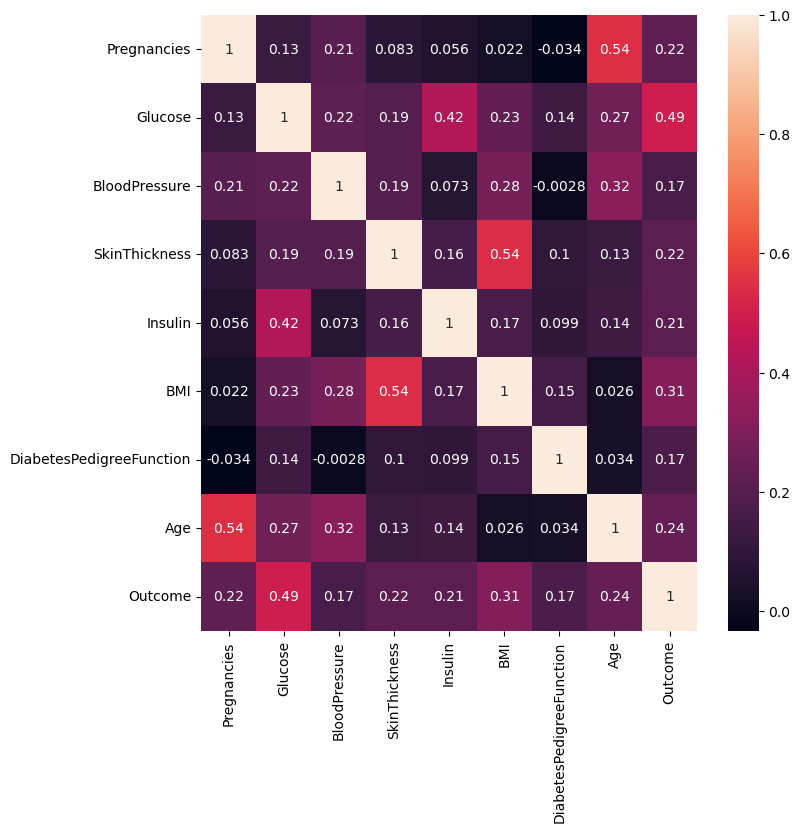

In [15]:
sns.heatmap(df.corr(), annot = True)
fig = plt.gcf()
fig.set_size_inches(8,8)

In [16]:
#Getting top 4 features that has the highest correlation
print(df.corr().nlargest(4,'Outcome').index)

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')


In [17]:
#Getting top 4 features that has the highest correlation
print(df.corr().nlargest(4,'Outcome').values[:,8])

[1.         0.49292767 0.31192439 0.23835598]


* Apart from the Outcome feature, the three most influential features are Glucose, BMI, Age. 
* We will use these three features to train our model

##  EVALUATING THE ALGORITHMS

* **LINEAR REGRESSION**
* Instead of splitting the dataset into training and testing sets, we will use 10-fold cross validation to obtain the accuracy/average score of the algorithm used.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [19]:
#---features---
X = df[['Glucose','BMI','Age']]

In [20]:
##---label---
y = df.iloc[:,8]

In [21]:
log_regress = LogisticRegression()
log_regress_score = cross_val_score(log_regress,X,y,cv=10,scoring='accuracy').mean()

In [22]:
print(log_regress_score)

0.7669856459330144


* We will save this result to a list so that we can use it to compare with the scores of other algorithms.

In [23]:
result = []
result.append(log_regress_score)

### K - nearest Neighbour

In [24]:
#We are going to try out various values of k to obtain optimal k value for best accuracy.
from sklearn.neighbors import KNeighborsClassifier

In [25]:
#---empty list that will hold cv scores---
cv_scores = []

In [26]:
#---number of folds---
folds=10

In [27]:
#---creating odd list of k for KNN---
ks = list(range(1,int(len(X) * ((folds-1)/folds)), 2))

In [28]:
#---performing k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X,y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)

In [29]:
#---getting the maximum score---
knn_score = max(cv_scores)
knn_score

0.7721462747778537

In [30]:
optimal_k = ks[cv_scores.index(knn_score)]
optimal_k

19

In [31]:
result.append(knn_score)

### SUPPORT VECTOR MACHINES

In [32]:
#We will use two types of kernels for SVM: Linear and RBF(Radial Basis Function)
from sklearn import svm

In [33]:
linear_svm = svm.SVC(kernel ='linear')

In [34]:
linear_svm_score = cross_val_score(linear_svm, X, y, cv=10, scoring='accuracy').mean()

In [35]:
print(linear_svm_score)

0.7656527682843473


In [36]:
result.append(linear_svm_score)

In [37]:
rbf = svm.SVC(kernel='rbf')

In [38]:
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()

In [39]:
print(rbf_score)

0.765704032809296


In [40]:
result.append(rbf_score)

In [41]:
#---Selecting the best performing algorithm---
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM Linear Kernel", "SVM RBF Kernel"]

In [42]:
cv_mean = pd.DataFrame(result,index=algorithms)
cv_mean.columns = ["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)

,Accuracy
K Nearest Neighbors,0.772146
Logistic Regression,0.766986
SVM RBF Kernel,0.765704
SVM Linear Kernel,0.765653


In [46]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=19)

In [47]:
# Save the model
import pickle
filename = 'diabetes.sav' # Save the model to the disk
pickle.dump(knn, open(filename, 'wb')) # Write to the file using write and binary mode

* **The trained model is now saved to a file named diabetes.sav. Let’s load it to ensure that it was saved properly:**

In [48]:
# Load the model from the disk
loaded_model = pickle.load(open(filename, 'rb'))

In [50]:
Glucose = 65
BMI = 70
Age = 50

prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
    print('Non-Diabetic')
else:
    print('Diabitic')

[0]
Non-Diabetic


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [51]:
Glucose = 125
BMI = 95
Age = 50

prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if (prediction[0]==0):
    print('Non-Diabetic')
else:
    print('Diabitic')

[1]
Diabitic


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [52]:
!pip install flask